Data preprocessing :

Two data source will be imported
"AIS_weather_h_rename_copy.csv" will be used to replace the information for true current direction and true wind direction

In [50]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
import seaborn as sns
import math

df = pd.read_csv("AIS_weather_H_ok2_copy.csv")
df = df[df['LAT'] > 55.04 ]

dfship_pre = pd.read_csv("AIS_weather_h_rename_copy.csv")
dfship_pre2 = dfship_pre[dfship_pre['LAT'] > 55.04 ]

#pd.reset_option("all")


In [51]:
dfship_pre3 = dfship_pre2.drop(dfship_pre2.columns[[0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,21,22,23,26]],axis=1)
dfship_pre3 = dfship_pre3.rename({'Eastward wind': 'eastwind', 'Northward wind': 'northwind',
                           'Eastward current': 'eastcurrent', 'Northward current': 'northcurrent',
                           'SOG':'sog','COG':'cog','Heading':'heading'},axis=1) 
dfship_pre3.head(n=5)

,eastwind,northwind,eastcurrent,northcurrent,sog,cog
0,2.267688,6.741482,0.113690,0.044994,0.0,358.9
1,1.782681,6.410275,0.113690,0.044994,0.0,358.9
2,1.154659,6.385135,0.083984,0.054000,0.0,358.9
3,0.348801,6.094659,0.083984,0.054000,0.0,358.9
4,-0.593128,6.153186,0.083984,0.054000,0.0,358.9


Complete missing values for the current data using KNN imputer

In [52]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(dfship_pre3)

KNNImputer()

In [53]:
xship = imputer.transform(dfship_pre3)

In [54]:
dfship_pre3 = pd.DataFrame(xship, columns=dfship_pre3.columns, index=dfship_pre3.index)
dfship_pre3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453 entries, 0 to 7995
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   eastwind      7453 non-null   float64
 1   northwind     7453 non-null   float64
 2   eastcurrent   7453 non-null   float64
 3   northcurrent  7453 non-null   float64
 4   sog           7453 non-null   float64
 5   cog           7453 non-null   float64
dtypes: float64(6)
memory usage: 407.6 KB


In [55]:
dfship_pre3["windspeed"] = np.sqrt(dfship_pre3["eastwind"]**2 + dfship_pre3["northwind"]**2)
dfship_pre3["winddir"] = np.rad2deg(np.arctan(dfship_pre3["eastwind"]/dfship_pre3["northwind"]))

In [56]:
dfship_pre3["curspeed"] = np.sqrt(dfship_pre3["eastcurrent"]**2 + dfship_pre3["northcurrent"]**2)
dfship_pre3["curdir"] = np.rad2deg(np.arctan(dfship_pre3["eastcurrent"]/dfship_pre3["northcurrent"]))

In [57]:
dfship_pre3["vgms"] = dfship_pre3["sog"]/1.9438

In [58]:
dfship_pre3["vgx"] = dfship_pre3["vgms"] * np.sin(np.deg2rad(dfship_pre3["cog"]))
dfship_pre3["vcx"] = dfship_pre3["curspeed"] * np.sin(np.deg2rad(dfship_pre3["curdir"]))
dfship_pre3["stw_x"] = (dfship_pre3["vgx"] - dfship_pre3["vcx"])

In [59]:
dfship_pre3["vgy"] = dfship_pre3["vgms"] * np.cos(np.deg2rad(dfship_pre3["cog"]))
dfship_pre3["vcy"] = dfship_pre3["curspeed"] * np.cos(np.deg2rad(dfship_pre3["curdir"]))
dfship_pre3["stw_y"] = (dfship_pre3["vgy"] - dfship_pre3["vcy"])

In [60]:
dfship_pre3["vwms"] = np.sqrt(dfship_pre3["stw_x"]**2 + dfship_pre3["stw_y"]**2)
dfship_pre3["stw"] = dfship_pre3["vwms"]*1.9438
dfship_pre3.head(n=10)

,eastwind,northwind,eastcurrent,northcurrent,sog,cog,windspeed,winddir,curspeed,curdir,vgms,vgx,vcx,stw_x,vgy,vcy,stw_y,vwms,stw
0,2.267688,6.741482,0.113690,0.044994,0.000000,358.900000,7.112664,18.591820,0.122270,68.408246,0.000000,-0.000000,0.113690,-0.113690,0.000000,0.044994,-0.044994,0.122270,0.237667
1,1.782681,6.410275,0.113690,0.044994,0.000000,358.900000,6.653538,15.541109,0.122270,68.408246,0.000000,-0.000000,0.113690,-0.113690,0.000000,0.044994,-0.044994,0.122270,0.237667
2,1.154659,6.385135,0.083984,0.054000,0.000000,358.900000,6.488697,10.250337,0.099846,57.259552,0.000000,-0.000000,0.083984,-0.083984,0.000000,0.054000,-0.054000,0.099846,0.194082
3,0.348801,6.094659,0.083984,0.054000,0.000000,358.900000,6.104632,3.275496,0.099846,57.259552,0.000000,-0.000000,0.083984,-0.083984,0.000000,0.054000,-0.054000,0.099846,0.194082
4,-0.593128,6.153186,0.083984,0.054000,0.000000,358.900000,6.181707,-5.505940,0.099846,57.259552,0.000000,-0.000000,0.083984,-0.083984,0.000000,0.054000,-0.054000,0.099846,0.194082
5,-1.140082,6.917303,0.048465,0.099054,0.000000,358.900000,7.010625,-9.359123,0.110275,26.071643,0.000000,-0.000000,0.048465,-0.048465,0.000000,0.099054,-0.099054,0.110275,0.214353
6,-1.244867,7.608953,0.048465,0.099054,0.000000,358.900000,7.710115,-9.291591,0.110275,26.071643,0.000000,-0.000000,0.048465,-0.048465,0.000000,0.099054,-0.099054,0.110275,0.214353
7,-0.910214,7.986181,0.048465,0.099054,0.000000,358.900000,8.037884,-6.502153,0.110275,26.071643,0.000000,-0.000000,0.048465,-0.048465,0.000000,0.099054,-0.099054,0.110275,0.214353
8,0.137991,7.647350,0.083033,0.062728,14.578394,299.573513,7.648595,1.033749,0.104064,52.930471,7.499945,-6.522876,0.083033,-6.605910,3.701522,0.062728,3.638794,7.541808,14.659766
9,1.049884,6.617633,0.061865,0.083661,18.148696,302.274508,6.700397,9.014812,0.104050,36.481737,9.336709,-7.894183,0.061865,-7.956048,4.985581,0.083661,4.901920,9.344919,18.164654


In [61]:
dfship_pre = dfship_pre3.drop(dfship_pre3.columns[[0,1,2,3,10,11,12,13,14,15,16,17]],axis=1)
dfship_pre = dfship_pre[["sog","stw","windspeed","winddir","curdir","curspeed"]]
dfship_pre.head(n=10)

,sog,stw,windspeed,winddir,curdir,curspeed
0,0.000000,0.237667,7.112664,18.591820,68.408246,0.122270
1,0.000000,0.237667,6.653538,15.541109,68.408246,0.122270
2,0.000000,0.194082,6.488697,10.250337,57.259552,0.099846
3,0.000000,0.194082,6.104632,3.275496,57.259552,0.099846
4,0.000000,0.194082,6.181707,-5.505940,57.259552,0.099846
5,0.000000,0.214353,7.010625,-9.359123,26.071643,0.110275
6,0.000000,0.214353,7.710115,-9.291591,26.071643,0.110275
7,0.000000,0.214353,8.037884,-6.502153,26.071643,0.110275
8,14.578394,14.659766,7.648595,1.033749,52.930471,0.104064
9,18.148696,18.164654,6.700397,9.014812,36.481737,0.104050


In [62]:
dfship_pre.describe()

,sog,stw,windspeed,winddir,curdir,curspeed
count,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000
mean,8.870751,8.953972,6.513813,6.323949,-0.314076,0.102123
std,8.619512,8.533383,3.048934,56.940496,55.909250,0.066023
min,-0.009130,0.001840,0.193221,-89.961480,-89.957853,0.000735
25%,0.000000,0.203696,4.149883,-46.613951,-50.925875,0.055105
50%,6.953578,7.027546,6.285080,12.348882,-2.487970,0.087941
75%,18.014436,17.974368,8.525129,59.985376,51.896808,0.133419
max,21.070514,21.221281,16.760001,89.907884,89.975398,0.525174


MAIN SCRIPT

In [63]:
# Master Drop, vary from here 
#df_ship = df.drop(['Unnamed: 0','Time','LON','LAT','Temperature above oceans [K]','Air density above oceans [kg/m^3]','Max wave height [m]',
#'Swell period [deg]','Wind wave period [s]','Wave period [s]','Sea surface temperature [K]','Combined wind waves and swell height [m]','Swell height [m]',
#'Wind wave height [m]','Surface pressure [Pa]','Draught [m]','Width [m]','Length [m]','SOG [knot]','COG [deg]','Heading [deg]','Wind Speed [m/s]','Current Speed [m/s]'
#,'True Wind Direction [deg]','True Current Direction [deg]','True Swell Direction [deg]','True Wind Wave Direction [deg]','True Wave Direction [deg]'],axis=1)
#df_ship.head(n=5)

df_ship = df.drop(['Unnamed: 0','Time','LON','LAT','Air density above oceans',
'Surface pressure','Width','Length'],axis=1)
df_ship.head(n=5)

,Temperature above oceans,Max wave height,Swell period,Wind wave period,Wave period,Sea surface temperature,Combined wind waves and swell height,Swell height,Wind wave height,Draught,SOG,COG,Heading,Wind Speed,Current Speed,True Wind Direction,True Current Direction,True Swell Direction,True Wind Wave Direction,True Wave Direction
0,277.311035,1.893614,4.818881,3.818459,4.154329,279.858398,0.985695,0.566879,0.805267,5.026295,0.0,358.9,174.0,7.112664,0.122270,155.408180,105.591753,22.854050,22.749664,22.610062
1,277.328369,1.752303,4.755800,3.470216,4.130580,279.858398,0.916525,0.653061,0.641006,5.013148,0.0,358.9,174.0,6.653538,0.122270,158.458891,105.591753,26.122772,19.152008,22.209274
2,277.390625,1.619775,4.645083,3.259682,4.083755,279.858398,0.851447,0.650009,0.545059,5.021913,0.0,358.9,174.0,6.488697,0.099846,163.749663,116.740448,28.498383,12.424912,20.857971
3,277.411377,1.518736,4.588384,3.177906,4.010502,279.858398,0.799149,0.604842,0.515686,5.007304,0.0,358.9,174.0,6.104632,0.099846,170.724504,116.740448,29.956985,6.725922,18.732071
4,277.430664,1.455034,4.528841,3.281654,3.913362,279.858398,0.767285,0.522369,0.549881,5.007889,0.0,358.9,174.0,6.181707,0.099846,179.505940,116.740448,34.486298,3.761627,15.731430


In [64]:
df_ship2 = df_ship.rename({'Max wave height': 'waveheight', 'Draught': 'draught',
                           'SOG': 'sog', 'Wind Speed': 'windspeed', 
                           'True Wind Direction': 'truewinddir','Temperature above oceans' : 'oceantemperature',
                           'COG': 'cog', 'Current Speed' : 'curspeed','True Wave Direction' : 'truewavedir',
                            'Swell period': 'swellperiod','Wind wave period': 'windwaveperiod','Sea surface temperature': 'surftemp',
                            'Combined wind waves and swell height': 'windwaveswellheight','Swell height': 'swellheight','Wind wave height': 'windwaveheight',
                            'Heading': 'heading','True Current Direction': 'truecurrentdir','True Swell Direction': 'trueswelldir',
                            'True Wind Wave Direction': 'truewindwavedir','Wave period': 'waveperiod'
                           }, axis=1) 

In [65]:
df_ship2["stw"] = dfship_pre["stw"]
df_ship2["northcurrdir"] = dfship_pre["curdir"]
df_ship2["nortwinddir"] = dfship_pre["winddir"]

df_ship2.head(n=10)

,oceantemperature,waveheight,swellperiod,windwaveperiod,waveperiod,surftemp,windwaveswellheight,swellheight,windwaveheight,draught,...,windspeed,curspeed,truewinddir,truecurrentdir,trueswelldir,truewindwavedir,truewavedir,stw,northcurrdir,nortwinddir
0,277.311035,1.893614,4.818881,3.818459,4.154329,279.858398,0.985695,0.566879,0.805267,5.026295,...,7.112664,0.122270,155.408180,105.591753,22.854050,22.749664,22.610062,0.237667,68.408246,18.591820
1,277.328369,1.752303,4.755800,3.470216,4.130580,279.858398,0.916525,0.653061,0.641006,5.013148,...,6.653538,0.122270,158.458891,105.591753,26.122772,19.152008,22.209274,0.237667,68.408246,15.541109
2,277.390625,1.619775,4.645083,3.259682,4.083755,279.858398,0.851447,0.650009,0.545059,5.021913,...,6.488697,0.099846,163.749663,116.740448,28.498383,12.424912,20.857971,0.194082,57.259552,10.250337
3,277.411377,1.518736,4.588384,3.177906,4.010502,279.858398,0.799149,0.604842,0.515686,5.007304,...,6.104632,0.099846,170.724504,116.740448,29.956985,6.725922,18.732071,0.194082,57.259552,3.275496
4,277.430664,1.455034,4.528841,3.281654,3.913362,279.858398,0.767285,0.522369,0.549881,5.007889,...,6.181707,0.099846,179.505940,116.740448,34.486298,3.761627,15.731430,0.194082,57.259552,-5.505940
5,277.389648,1.449675,4.456523,3.420509,3.809428,279.858398,0.765216,0.429047,0.621552,5.016434,...,7.010625,0.110275,176.640877,147.928357,42.184875,1.198700,11.748291,0.214353,26.071643,-9.359123
6,277.320557,1.518332,4.351818,3.521645,3.737560,279.858398,0.798019,0.356232,0.705246,5.021130,...,7.710115,0.110275,176.708409,147.928357,46.624313,0.294296,7.536240,0.214353,26.071643,-9.291591
7,277.155518,1.623140,4.303657,3.603798,3.731513,279.858398,0.848175,0.325363,0.779129,5.014087,...,8.037884,0.110275,179.497847,147.928357,38.309525,0.913208,4.786667,0.214353,26.071643,-6.502153
8,276.900391,1.661038,4.291309,3.667458,3.757862,279.699585,0.865413,0.323892,0.801956,5.017723,...,7.648595,0.104064,91.133175,143.029898,82.454986,91.138748,90.495209,14.659766,52.930471,1.033749
9,276.705566,1.501637,4.187211,3.145607,3.803910,279.820312,0.785675,0.452440,0.578049,5.019207,...,6.700397,0.104050,68.884377,96.351303,134.548587,115.015200,120.971331,18.164654,36.481737,9.014812


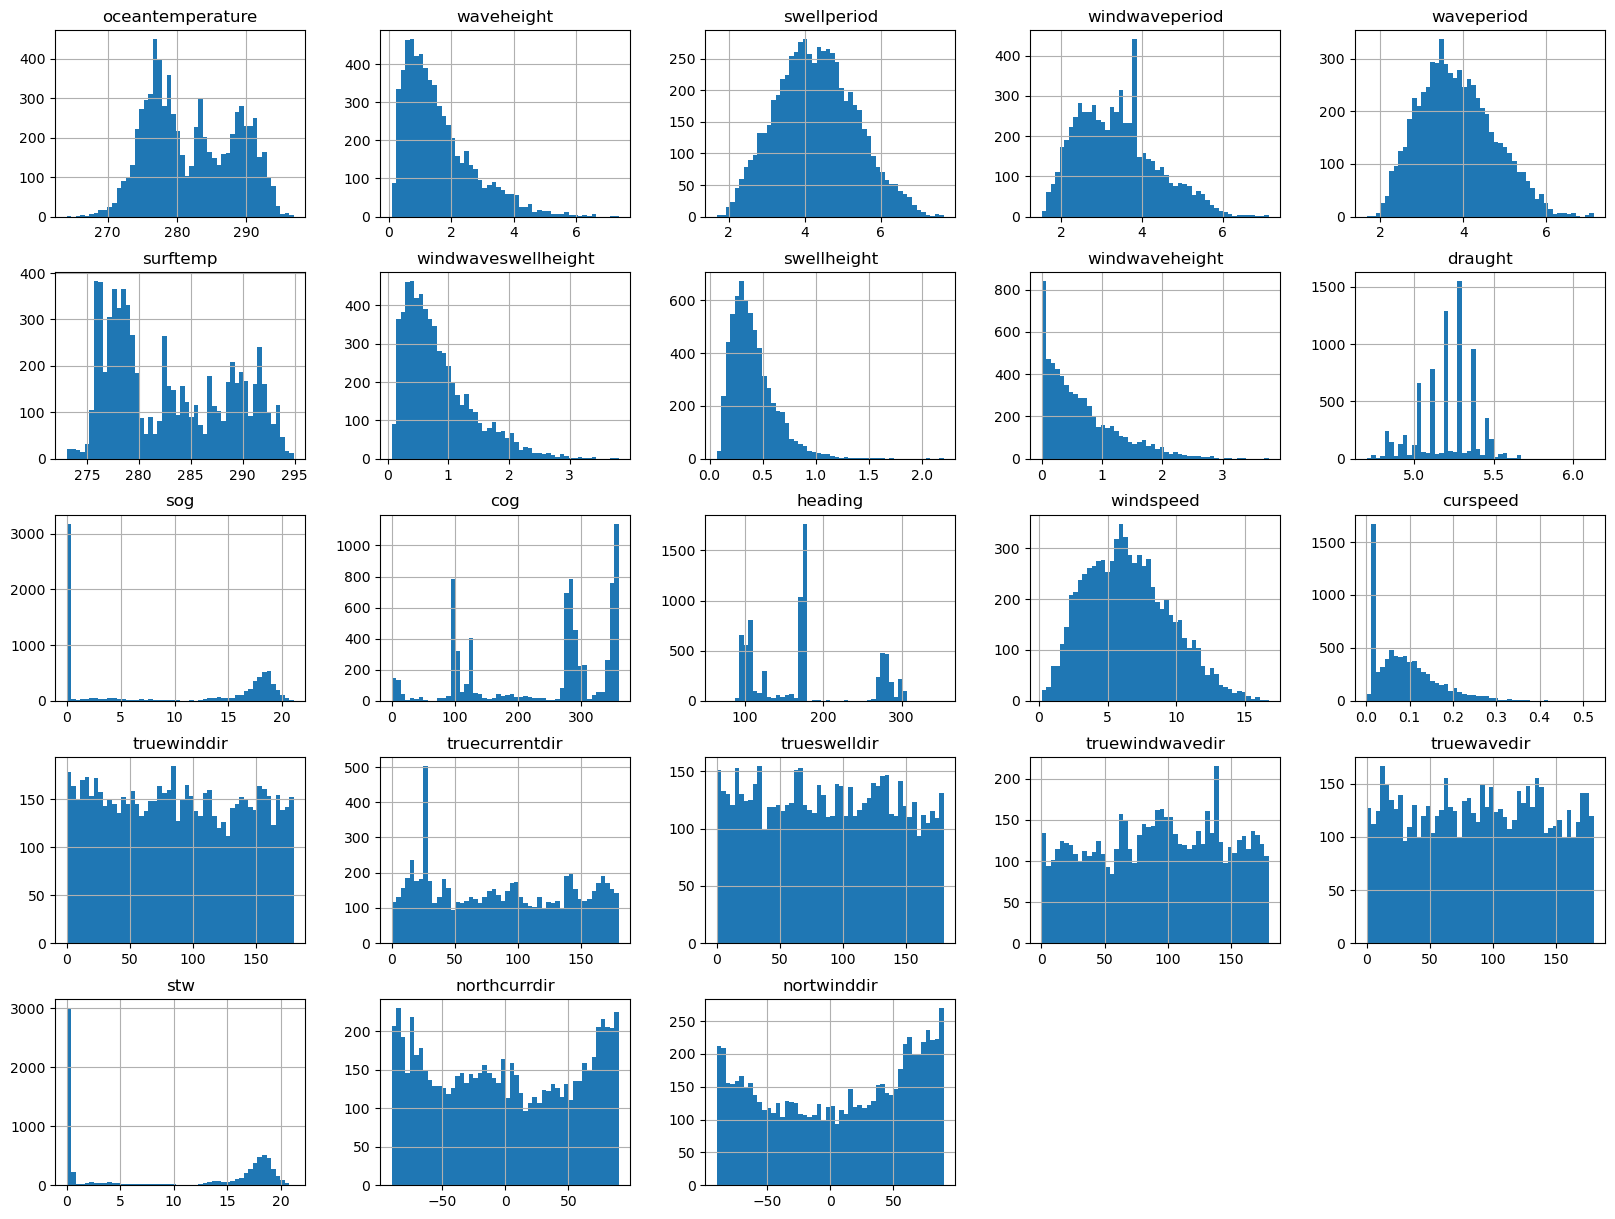

In [66]:
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
df_ship2.hist(bins=50,figsize=(20,15))
plt.show()

In [67]:
corr_matrix = df_ship2.corr()
print(corr_matrix["sog"])

oceantemperature       0.088598
waveheight            -0.157069
swellperiod           -0.211793
windwaveperiod        -0.109080
waveperiod            -0.210662
surftemp               0.080481
windwaveswellheight   -0.154708
swellheight           -0.265872
windwaveheight        -0.108153
draught                0.130693
sog                    1.000000
cog                   -0.422707
heading                0.226838
windspeed             -0.019330
curspeed              -0.020295
truewinddir            0.011425
truecurrentdir         0.083648
trueswelldir           0.012316
truewindwavedir       -0.036343
truewavedir            0.012555
stw                    0.999814
northcurrdir          -0.012361
nortwinddir           -0.029499
Name: sog, dtype: float64


In [68]:
df_ship2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453 entries, 0 to 7995
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   oceantemperature     7453 non-null   float64
 1   waveheight           6274 non-null   float64
 2   swellperiod          6274 non-null   float64
 3   windwaveperiod       6274 non-null   float64
 4   waveperiod           6274 non-null   float64
 5   surftemp             7318 non-null   float64
 6   windwaveswellheight  6274 non-null   float64
 7   swellheight          6274 non-null   float64
 8   windwaveheight       6274 non-null   float64
 9   draught              7453 non-null   float64
 10  sog                  7453 non-null   float64
 11  cog                  7453 non-null   float64
 12  heading              7453 non-null   float64
 13  windspeed            7453 non-null   float64
 14  curspeed             7453 non-null   float64
 15  truewinddir          7453 non-null   f

In [69]:
dfship_corr = df_ship2.drop(df_ship2.columns[[0,5,9,15,16,17,18,19,21,22]],axis=1)
dfship_corr.head()

,waveheight,swellperiod,windwaveperiod,waveperiod,windwaveswellheight,swellheight,windwaveheight,sog,cog,heading,windspeed,curspeed,stw
0,1.893614,4.818881,3.818459,4.154329,0.985695,0.566879,0.805267,0.0,358.9,174.0,7.112664,0.122270,0.237667
1,1.752303,4.755800,3.470216,4.130580,0.916525,0.653061,0.641006,0.0,358.9,174.0,6.653538,0.122270,0.237667
2,1.619775,4.645083,3.259682,4.083755,0.851447,0.650009,0.545059,0.0,358.9,174.0,6.488697,0.099846,0.194082
3,1.518736,4.588384,3.177906,4.010502,0.799149,0.604842,0.515686,0.0,358.9,174.0,6.104632,0.099846,0.194082
4,1.455034,4.528841,3.281654,3.913362,0.767285,0.522369,0.549881,0.0,358.9,174.0,6.181707,0.099846,0.194082


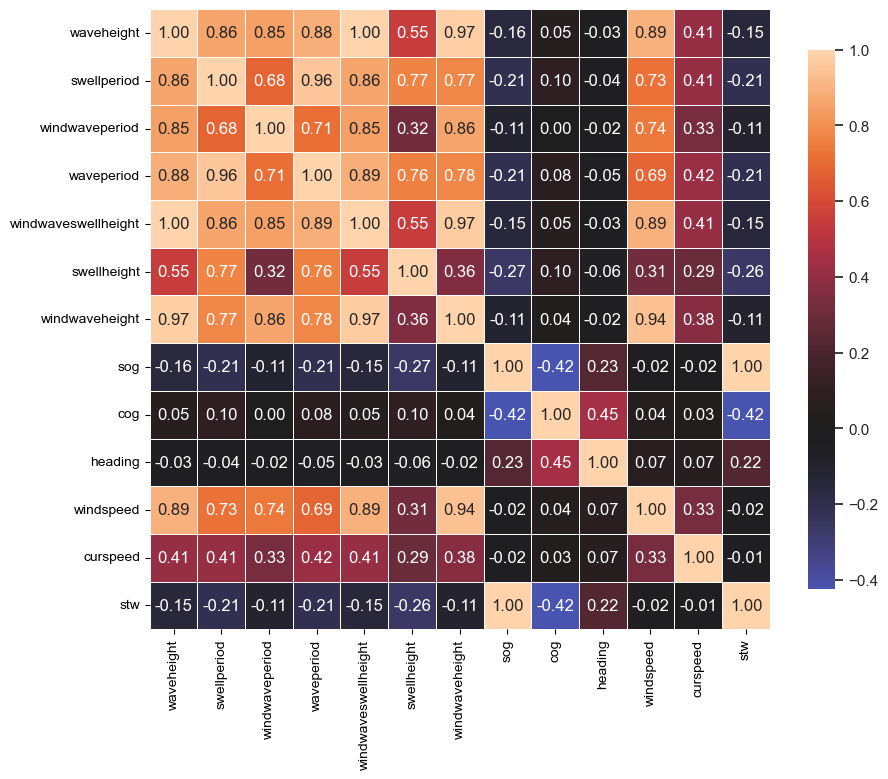

In [70]:
def correlation_heatmap(df,fontsize):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.set(font_scale = fontsize)
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(dfship_corr,1)

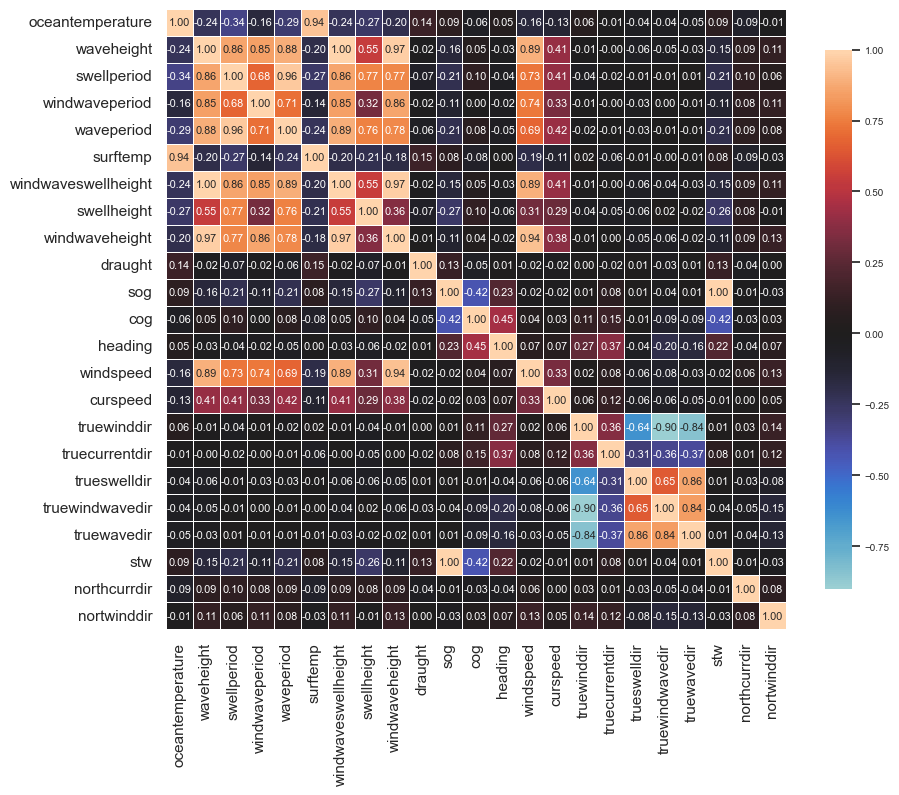

In [71]:
correlation_heatmap(df_ship2,0.65)

In [72]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputer.fit(df_ship2)

KNNImputer()

In [73]:
X = imputer.transform(df_ship2)

In [74]:
df_ship2tr = pd.DataFrame(X, columns=df_ship2.columns, index=df_ship2.index)

In [75]:
df_ship2tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453 entries, 0 to 7995
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   oceantemperature     7453 non-null   float64
 1   waveheight           7453 non-null   float64
 2   swellperiod          7453 non-null   float64
 3   windwaveperiod       7453 non-null   float64
 4   waveperiod           7453 non-null   float64
 5   surftemp             7453 non-null   float64
 6   windwaveswellheight  7453 non-null   float64
 7   swellheight          7453 non-null   float64
 8   windwaveheight       7453 non-null   float64
 9   draught              7453 non-null   float64
 10  sog                  7453 non-null   float64
 11  cog                  7453 non-null   float64
 12  heading              7453 non-null   float64
 13  windspeed            7453 non-null   float64
 14  curspeed             7453 non-null   float64
 15  truewinddir          7453 non-null   f

In [76]:
# Implement the Random forest, but first, data is to be split into training and validation data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_ship2tr.drop(['sog','stw'],axis=1),df_ship2tr.sog,test_size=0.2,random_state=42)


In [77]:
x_train

,oceantemperature,waveheight,swellperiod,windwaveperiod,waveperiod,surftemp,windwaveswellheight,swellheight,windwaveheight,draught,...,heading,windspeed,curspeed,truewinddir,truecurrentdir,trueswelldir,truewindwavedir,truewavedir,northcurrdir,nortwinddir
7849,273.689453,1.903392,5.168277,3.889747,4.129031,278.249023,0.989900,0.419144,0.894226,4.998273,...,173.378172,8.377506,0.077309,52.717592,111.013014,172.903383,128.638033,134.130404,62.365158,-59.339420
446,276.927002,0.735258,3.607073,1.954018,3.369207,277.552124,0.398392,0.342560,0.162720,5.199557,...,124.934560,4.326051,0.070420,125.368141,121.313346,59.294994,57.766124,63.021755,3.621213,-0.433582
763,273.599243,1.818458,4.729419,2.375954,4.557055,277.389282,0.956662,0.916744,0.249573,5.110976,...,174.612903,4.602489,0.064624,130.192840,57.165581,19.955646,52.156170,15.603458,-62.552678,44.420063
2764,278.710449,0.721055,4.557714,2.532387,4.019384,278.912353,0.386143,0.333221,0.168640,5.292658,...,174.000000,4.371434,0.150352,97.937795,99.796772,109.081398,90.140121,102.801010,-86.203228,-88.062205
5033,288.929688,4.489095,5.438617,5.381607,5.382501,291.060547,2.365670,0.290192,2.347656,5.378323,...,94.551523,13.561472,0.016704,0.269007,13.555761,142.799154,176.290762,176.103018,69.803252,-85.717484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5533,290.820557,0.373232,2.555482,2.812599,2.446046,290.348267,0.212761,0.192871,0.069901,5.380923,...,100.545195,2.429712,0.011765,16.668276,55.550098,114.151476,151.207109,116.679186,44.995096,83.876918
5572,288.931152,1.997423,4.862336,3.859645,4.204206,290.358154,1.042727,0.453425,0.903073,5.291434,...,149.342624,5.400804,0.016704,75.284391,68.346862,115.442707,98.762488,101.550959,-78.700884,74.058233
5761,285.710449,1.085777,5.123824,2.513113,4.283919,288.593994,0.577680,0.455246,0.336029,5.286295,...,174.000000,5.957770,0.158087,59.134771,114.202550,122.145428,123.006043,158.881568,-71.797450,-65.134771
876,272.841065,5.619343,6.726208,6.288489,6.357797,276.691162,2.965053,0.590149,2.880615,5.110293,...,94.400034,15.077783,0.300923,168.875043,159.437190,17.706525,11.097636,10.211573,-65.037156,83.275077


In [78]:
y_train

7849     0.217572
446     16.780417
763      0.000000
2764     0.000000
5033    19.618552
          ...    
5533    19.327174
5572     3.143668
5761     0.000000
876     17.887736
7805    17.138849
Name: sog, Length: 5962, dtype: float64

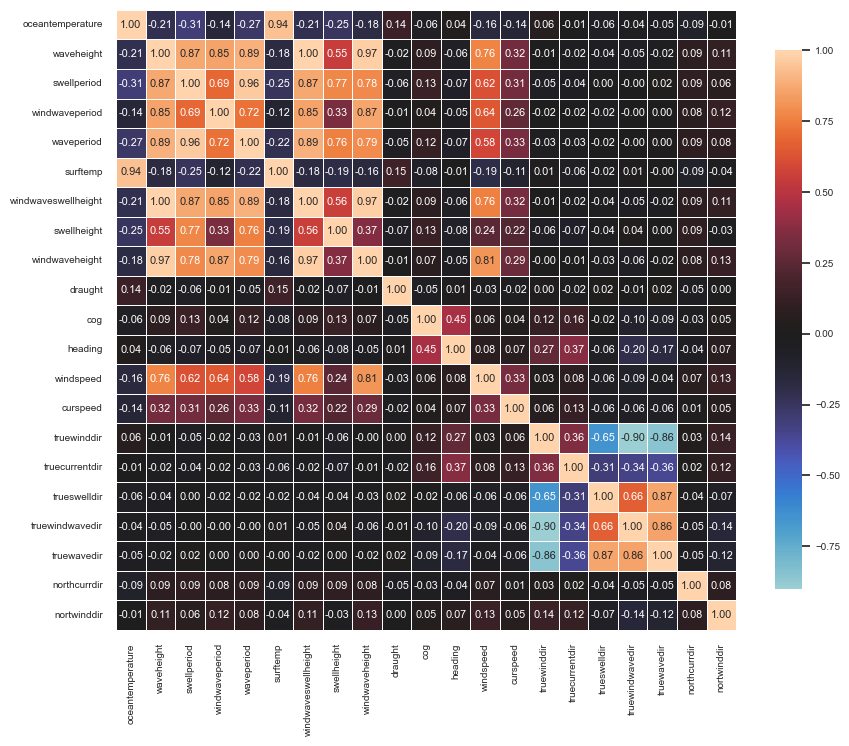

In [79]:
correlation_heatmap(x_train,0.65)

In [80]:
len(x_train)


5962

In [81]:
len(x_test)

1491

In [82]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [91]:
from sklearn import tree

fn=x_train.columns

#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=800)
#tree.plot_tree(model.estimators_[0],
#               fontsize=5,
#               max_depth=3,
#               feature_names = fn, 
#               filled = True);
fig, axes = plt.subplots(figsize = (25,5), dpi=800)
#figsize(width,height)
#plt.figure(figsize=(18,4.8))
tree.plot_tree(model.estimators_[0],
               max_depth=3,
               fontsize=8,
               feature_names = fn);
plt.show()

#fig.savefig('rf_individualtree.png')

In [84]:
mod_imp = model.feature_importances_
df_mod_imp = pd.DataFrame(mod_imp,index= x_train.columns,columns=["Importance"])
print(df_mod_imp)

                     Importance
oceantemperature       0.000520
waveheight             0.000177
swellperiod            0.000286
windwaveperiod         0.000401
waveperiod             0.000320
surftemp               0.000415
windwaveswellheight    0.000190
swellheight            0.000810
windwaveheight         0.000235
draught                0.001941
cog                    0.864080
heading                0.127282
windspeed              0.000292
curspeed               0.000426
truewinddir            0.000254
truecurrentdir         0.000598
trueswelldir           0.000294
truewindwavedir        0.000278
truewavedir            0.000212
northcurrdir           0.000619
nortwinddir            0.000370


In [85]:
hihi

NameError: name 'hihi' is not defined

In [ ]:
from sklearn.feature_selection import RFECV
selector = RFECV(estimator=RandomForestRegressor(), min_features_to_select=15)
selector.fit(x_train,y_train)

dfrank = pd.DataFrame(selector.support_,index=x_train.columns,columns=["Include"])
dfrank["Rank"] = pd.DataFrame(selector.ranking_,index=x_train.columns)
print(dfrank)

# This is already functioning 
#from sklearn.feature_selection import RFE
#rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=15)
#rfe.fit(x_train,y_train)

#dfrank = pd.DataFrame(rfe.support_,index=x_train.columns,columns=["Include"])
#dfrank["Rank"] = pd.DataFrame(rfe.ranking_,index=x_train.columns)
#print(dfrank)

#for i in range(x_train.shape[1]):
# print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

                     Include  Rank
oceantemperature        True     1
waveheight             False     7
swellperiod             True     1
windwaveperiod          True     1
waveperiod             False     3
surftemp                True     1
windwaveswellheight     True     1
swellheight             True     1
windwaveheight         False     4
draught                 True     1
cog                     True     1
heading                 True     1
windspeed              False     2
curspeed                True     1
truewinddir            False     5
truecurrentdir          True     1
trueswelldir            True     1
truewindwavedir         True     1
truewavedir            False     6
northcurrdir            True     1
nortwinddir             True     1


In [ ]:
model.score(x_test,y_test)
# r^2 score

0.9876409416212121

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
# Application for evaluation metrics, starting with explained variance

from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,y_predicted)
# Best value is 1 

0.9876410084281471

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_predicted)
# Best value is 0

0.3991176006071696

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predicted)
# Best value is 0

0.9179068807386962

In [ ]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test,y_predicted)
# Best value is 0

0.09705802223999949

Parameter optimization using GridSearchCV

In [ ]:
#from sklearn.model_selection import GridSearchCV

#param_grid = [
#    {'n_estimators': [1,100,200], 'min_samples_split': [2,10,20]},
#  ]

#forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
#grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
#                           scoring='neg_mean_squared_error',
#                           return_train_score=True)
#grid_search.fit(x_train, y_train)

In [ ]:
#grid_search.best_params_

In [ ]:
#grid_search.best_estimator_

In [ ]:
#y_pred_grid = grid_search.predict(x_test)

In [ ]:
# Application for evaluation metrics, starting with explained variance

#from sklearn.metrics import explained_variance_score
#explained_variance_score(y_test,y_pred_grid)
# Best value is 1 

In [ ]:
#from sklearn.metrics import mean_absolute_error
#mean_absolute_error(y_test,y_pred_grid)
# Best value is 0

In [ ]:
#from sklearn.metrics import mean_squared_error
#mean_squared_error(y_test,y_pred_grid)
# Best value is 0

In [ ]:
#from sklearn.metrics import median_absolute_error
#median_absolute_error(y_test,y_pred_grid)
# Best value is 0